# Connectionists' methods
*This notebook illustrates methods to implement tasks using linear classification*
***
Alessandro Tufano 2020

### Import Packages

In [2]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys; sys.path.insert(0, '..') #add the above level with the package




#import data
from sklearn.datasets import load_breast_cancer
#Load the dataset
data = load_breast_cancer()

# define X dataframe
X = data.data
X = pd.DataFrame(X)

# define y dataframe
y = data.target
y = pd.DataFrame(y,columns=['target'])

'''
useful material
https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3
'''

### Hyperparameters gridsearch and fit linear models

In [3]:
# import models
import sys; sys.path.insert(0, '..') #add the above level with the package
from logproj.M_learningMethod.train_model import train_models_classification
# add linear models
from logproj.M_learningMethod.connectionists_models import models_classification as con_class_mod


#add the model to the models dictionary
all_models_classification={}
all_models_classification.update(con_class_mod)


D_res_regr = train_models_classification(X,y,all_models_classification)
D_res_regr

,MODEL_NAME,MODEL,PARAMS,SCORE_TEST,SCORE_VALIDATION
0,perceptron single layer,"MLPClassifier(activation='relu', alpha=0.0001,...","{'activation': 'relu', 'hidden_layer_sizes': 1...",0.93445,0.941489


### Evaluate the best model

In [4]:
#Split into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#retrieve the best model from the grid search
best_model = D_res_regr.iloc[0]['MODEL']
best_model

y_pred = best_model.predict(x_test)

### Accuracy

In [5]:
score = best_model.score(x_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8881118881118881


### Confusion matrix

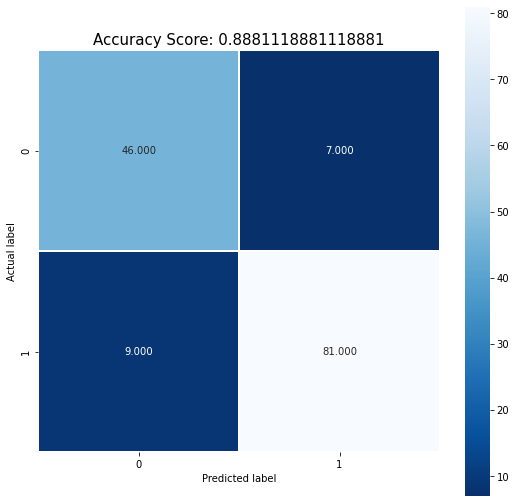

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#define the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Area under the ROC curve

AUC: 0.8839622641509435


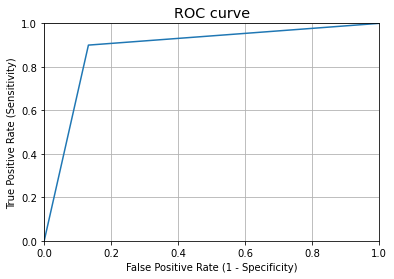

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# calculate the AUC
print(f"AUC: {metrics.roc_auc_score(y_test, y_pred)}")